<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/Evaluacion1_COLAB_ROBUSTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptor de Evaluación N°1
(Se incluye el texto completo de la pauta en la versión con descriptor, si la necesitas la agrego igual aquí.)

# EVALUACIÓN N°1 — Trabajo de Análisis (Etapa 1)
**Estudiante:** Catalina Soledad Núñez Yañez  
**Herramientas:** Python (pandas, numpy, matplotlib) — Google Colab / Jupyter

## Requisitos del dataset (checklist)

In [2]:
# 2.1) Importar librerías
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import io # Importando el módulo io
import seaborn as sns           # para gráficos avanzados
from scipy import stats         # para pruebas estadísticas


In [3]:
# 2.2) Subir archivo desde tu PC (Google Colab)
# Si usas Jupyter en tu PC, omite esta celda y pon la ruta local en la siguiente.
try:
    from google.colab import files
    uploaded = files.upload()  # Selecciona tu CSV (por ejemplo, 'outfits.csv' o 'outfits (1).csv')
except Exception as e:
    print("Ejecutando fuera de Colab. Si estás en Jupyter, continúa con la siguiente celda y define PATH manualmente.")

Saving outfits.csv to outfits.csv


In [4]:
# 2.3) Cargar archivo (robusto a separador/encoding y nombres como 'outfits (1).csv')
def cargar_csv_subido(uploaded_dict, prefer='outfits'):
    # Elegir el archivo: si hay uno que contenga 'outfits' en el nombre, úsalo.
    if uploaded_dict and len(uploaded_dict) > 0:
        keys = list(uploaded_dict.keys())
        key = None
        for k in keys:
            if prefer.lower() in k.lower():
                key = k
                break
        if key is None:
            key = keys[0]
        raw = uploaded_dict[key]
        # Intentos de carga robusta
        encodings = ['utf-8', 'latin-1']
        # Probar detector automático de separador (sep=None) y luego una lista fija
        seps = [None, ',', ';', '\t', '|']
        for enc in encodings:
            for sep in seps:
                try:
                    text = raw.decode(enc, errors='ignore')
                    buf = io.StringIO(text)
                    df_try = pd.read_csv(buf, sep=sep, engine='python', on_bad_lines='skip')
                    if df_try.shape[1] >= 3:  # sanity check
                        return df_try, key, enc, sep if sep is not None else 'auto'
                except Exception as e:
                    continue
        raise ValueError("No se pudo parsear el CSV con los intentos de encoding/separador.")
    else:
        raise FileNotFoundError("No se subió ningún archivo.")

# Si vienes de Colab:
try:
    df, filename_used, enc_used, sep_used = cargar_csv_subido(uploaded)
    print(f"Archivo leído: {filename_used} | encoding: {enc_used} | separador: {sep_used}")
except NameError:
    # Modo Jupyter/local: define PATH manualmente, por ejemplo: PATH = 'outfits.csv'
    PATH = 'outfits.csv'  # cámbialo si tu archivo tiene otro nombre
    # Intento robusto en modo archivo local
    def try_local(path):
        encodings = ['utf-8','latin-1']
        seps = [None, ',', ';', '\t', '|']
        for enc in encodings:
            for sep in seps:
                try:
                    return pd.read_csv(path, sep=sep, engine='python')
                except Exception:
                    pass
        raise FileNotFoundError(f"No se pudo leer {path}. Revisa nombre, encoding o separador.")
    df = try_local(PATH)
    filename_used, enc_used, sep_used = PATH, 'desconocido', 'auto'
    print(f"Archivo leído: {filename_used} | separador: {sep_used}")

df.head(5)

Archivo leído: outfits.csv | encoding: utf-8 | separador: auto


,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


In [5]:
# 2.4) Variable de tiempo: parseo a datetime
if 'timeCreated' not in df.columns:
    # Algunos CSV pueden traer la columna con mayúsculas distintas
    posibles = [c for c in df.columns if c.lower()=='timecreated']
    if posibles:
        df.rename(columns={posibles[0]:'timeCreated'}, inplace=True)

df['timeCreated'] = pd.to_datetime(df['timeCreated'], errors='coerce')
df[['timeCreated']].head(3)

,timeCreated
0,2017-12-30 11:28:01.000
1,2021-06-07 12:07:22.921
2,2023-06-05 09:17:59.004


In [6]:
# 2.5) Cast numéricos en hechos
for col in ['retailPrice','pricePerWeek','pricePerMonth']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df[['retailPrice','pricePerWeek','pricePerMonth']].head(3) if set(['retailPrice','pricePerWeek','pricePerMonth']).issubset(df.columns) else df.head(3)

,retailPrice,pricePerWeek,pricePerMonth
0,4000.0,600.0,1200.0
1,1300.0,590.0,1180.0
2,3100.0,930.0,1860.0


In [7]:
# 2.6) Validaciones OK/NO exactas de la pauta
hechos = [c for c in ['retailPrice','pricePerWeek','pricePerMonth'] if c in df.columns]
descriptores = [c for c in ['name','group','owner','outfit_tags','tag_categories','description'] if c in df.columns]

checks = {
    'Variable de tiempo (timeCreated)': df['timeCreated'].notna().any() if 'timeCreated' in df.columns else False,
    'X > 1000 registros': len(df) > 1000,
    'Calidad básica (<=20% nulos en hechos)': all(df[h].isna().mean() <= 0.20 for h in hechos) if hechos else False,
    'Hechos presentes': len(hechos) > 0,
    'Descriptores presentes': len(descriptores) > 0,
    'Formato permitido (.csv/.xlsx/.txt/.json)': True  # ya está cargado
}
print('--- VALIDACIÓN DE REQUISITOS ---')
for k,v in checks.items():
    print(f'{k}:', 'OK' if v else 'NO')
print('Filas:', len(df), '| Columnas:', len(df.columns))
if 'timeCreated' in df.columns:
    print('Rango temporal:', df['timeCreated'].min(), '→', df['timeCreated'].max())

--- VALIDACIÓN DE REQUISITOS ---
Variable de tiempo (timeCreated): OK
X > 1000 registros: OK
Calidad básica (<=20% nulos en hechos): OK
Hechos presentes: OK
Descriptores presentes: OK
Formato permitido (.csv/.xlsx/.txt/.json): OK
Filas: 15649 | Columnas: 11
Rango temporal: 2016-09-17 13:17:59 → 2024-02-12 08:46:08.930000


## Objetivo principal del análisis
Analizar la distribución de precios y su evolución temporal usando `timeCreated` como variable de tiempo, y comparar segmentos (p. ej. `group` o `tag_categories`).

## Descripción breve de la fuente de información y dataset (con referencia)
- **Fuente**: archivo `outfits.csv` provisto por la estudiante.  
- **Variable de tiempo**: `timeCreated`.  
- **Hechos**: `retailPrice`, `pricePerWeek`, `pricePerMonth`.  
- **Descriptores**: `name`, `group`, `owner`, `outfit_tags`, `tag_categories`, `description`.

## Análisis estadístico descriptivo completo

In [8]:
# 5.1) Función de medidas
def medidas_completas(s, peso=None):
    s = pd.to_numeric(s, errors='coerce').dropna()
    r = {}
    r['Media aritmética'] = s.mean()
    if peso is not None and peso.notna().any() and peso.sum() != 0:
        w = peso.reindex(s.index).fillna(0)
        r['Media ponderada'] = (s*w).sum()/w.sum()
    else:
        r['Media ponderada'] = np.nan
    r['Moda'] = s.mode().iloc[0] if not s.mode().empty else np.nan
    r['Mediana'] = s.median()
    r['Mínimo'] = s.min()
    r['Máximo'] = s.max()
    r['Rango'] = r['Máximo'] - r['Mínimo']
    r['Varianza'] = s.var(ddof=1)
    r['Desviación estándar'] = s.std(ddof=1)
    r['Coeficiente de variación'] = r['Desviación estándar']/r['Media aritmética'] if r['Media aritmética']!=0 else np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    r['Rango intercuartílico'] = q3 - q1
    r['Suma'] = s.sum()
    r['Conteo de observaciones'] = s.count()
    return pd.Series(r)

In [9]:
# 5.2) Tabla para retailPrice
peso = df['pricePerMonth'] if 'pricePerMonth' in df.columns else None
tabla_retail = medidas_completas(df['retailPrice'], peso=peso) if 'retailPrice' in df.columns else None
tabla_retail

,0
Media aritmética,2.669604e+03
Media ponderada,3.066112e+03
Moda,1.500000e+03
Mediana,2.000000e+03
Mínimo,0.000000e+00
Máximo,8.000000e+04
Rango,8.000000e+04
Varianza,7.876343e+06
Desviación estándar,2.806482e+03
Coeficiente de variación,1.051273e+00


In [10]:
# 5.3) Tabla para pricePerWeek
tabla_week = medidas_completas(df['pricePerWeek'], peso=peso) if 'pricePerWeek' in df.columns else None
tabla_week

,0
Media aritmética,6.716492e+02
Media ponderada,7.447666e+02
Moda,5.900000e+02
Mediana,5.900000e+02
Mínimo,0.000000e+00
Máximo,5.250000e+03
Rango,5.250000e+03
Varianza,4.582247e+04
Desviación estándar,2.140618e+02
Coeficiente de variación,3.187108e-01


In [11]:
# 5.4) Tabla para pricePerMonth
tabla_month = medidas_completas(df['pricePerMonth'], peso=peso) if 'pricePerMonth' in df.columns else None
tabla_month

,0
Media aritmética,1.314044e+03
Media ponderada,1.475967e+03
Moda,1.180000e+03
Mediana,1.180000e+03
Mínimo,0.000000e+00
Máximo,1.050000e+04
Rango,1.050000e+04
Varianza,2.127873e+05
Desviación estándar,4.612888e+02
Coeficiente de variación,3.510451e-01


## Representaciones gráficas obligatorias

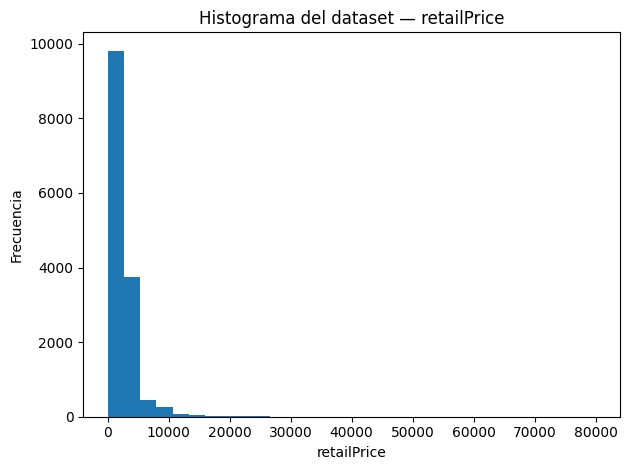

In [12]:
# 6.1) Histograma — retailPrice
if 'retailPrice' in df.columns:
    plt.figure()
    df['retailPrice'].dropna().plot(kind='hist', bins=30, title='Histograma del dataset — retailPrice')
    plt.xlabel('retailPrice'); plt.ylabel('Frecuencia'); plt.tight_layout(); plt.show()

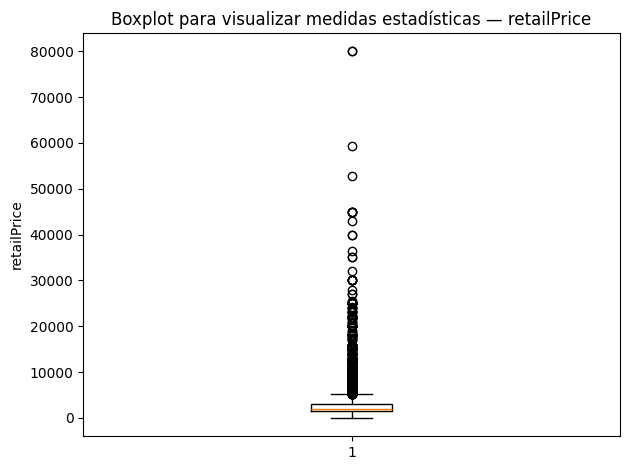

In [13]:
# 6.2) Boxplot — retailPrice
if 'retailPrice' in df.columns:
    plt.figure()
    plt.boxplot(df['retailPrice'].dropna(), vert=True)
    plt.title('Boxplot para visualizar medidas estadísticas — retailPrice')
    plt.ylabel('retailPrice'); plt.tight_layout(); plt.show()

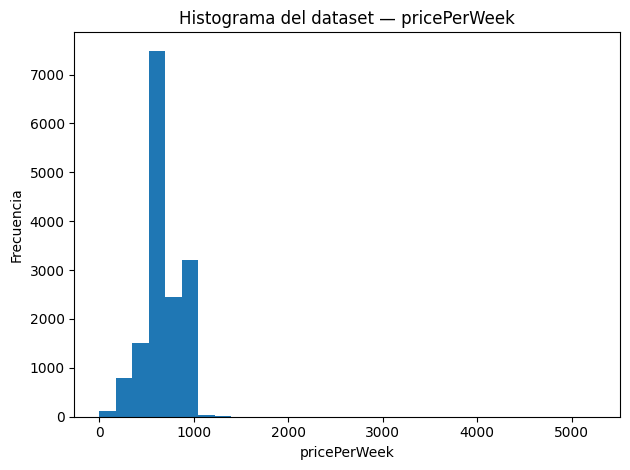

In [14]:
# 6.3) Histograma — pricePerWeek
if 'pricePerWeek' in df.columns:
    plt.figure()
    df['pricePerWeek'].dropna().plot(kind='hist', bins=30, title='Histograma del dataset — pricePerWeek')
    plt.xlabel('pricePerWeek'); plt.ylabel('Frecuencia'); plt.tight_layout(); plt.show()

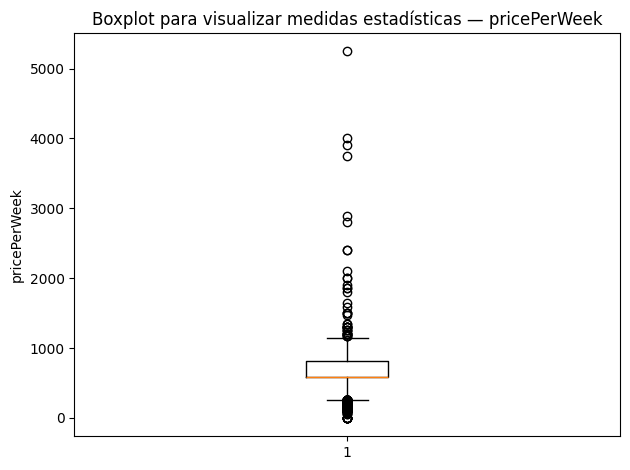

In [15]:
# 6.4) Boxplot — pricePerWeek
if 'pricePerWeek' in df.columns:
    plt.figure()
    plt.boxplot(df['pricePerWeek'].dropna(), vert=True)
    plt.title('Boxplot para visualizar medidas estadísticas — pricePerWeek')
    plt.ylabel('pricePerWeek'); plt.tight_layout(); plt.show()

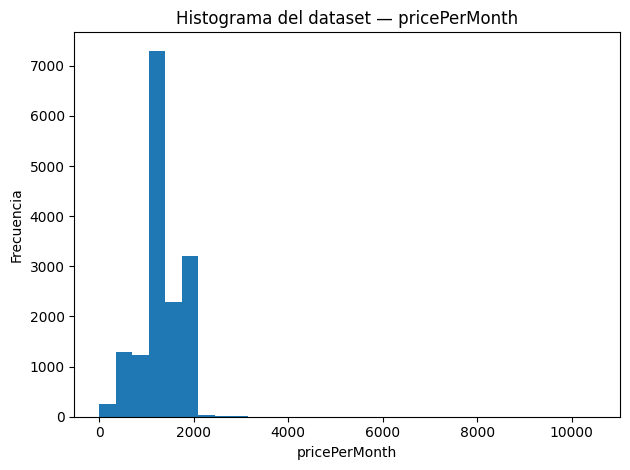

In [16]:
# 6.5) Histograma — pricePerMonth
if 'pricePerMonth' in df.columns:
    plt.figure()
    df['pricePerMonth'].dropna().plot(kind='hist', bins=30, title='Histograma del dataset — pricePerMonth')
    plt.xlabel('pricePerMonth'); plt.ylabel('Frecuencia'); plt.tight_layout(); plt.show()

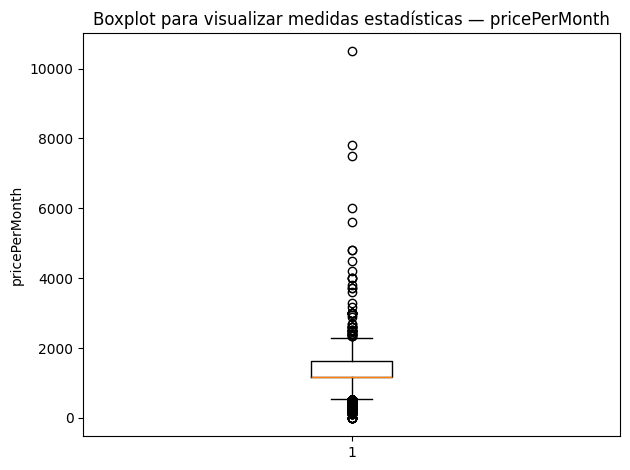

In [17]:
# 6.6) Boxplot — pricePerMonth
if 'pricePerMonth' in df.columns:
    plt.figure()
    plt.boxplot(df['pricePerMonth'].dropna(), vert=True)
    plt.title('Boxplot para visualizar medidas estadísticas — pricePerMonth')
    plt.ylabel('pricePerMonth'); plt.tight_layout(); plt.show()

## Regresión con la variable tiempo como variable predictiva

In [18]:
# 7.1) Construcción de t (días)
df_reg = df.dropna(subset=['timeCreated']).copy() if 'timeCreated' in df.columns else pd.DataFrame()
if not df_reg.empty:
    df_reg = df_reg.sort_values('timeCreated')
    df_reg['t_dias'] = (df_reg['timeCreated'] - df_reg['timeCreated'].min()).dt.total_seconds()/(3600*24)
df_reg.head(3) if not df_reg.empty else print("No hay datos con timeCreated válido.")

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories,t_dias
7432,outfit.900438ff036a2f39,Out of stock - Lupus Jurk,Lang brunmønstret kjole med tilhørende belte f...,group.9577d6fb959ebb7774e0f78d9bd355d2,o_00305,2016-09-17 13:17:59,NaN,200.0,300.0,"['Silk', 'Brown', 'Dresses', 'Pattern', 'S', '...","['Material', 'Color', 'Category', 'Details', '...",0.0
8369,outfit.8521092bd0254c06,Out of stock - Red Flowered Dress,Leken og sommerlig kjole fra Pia Tjelta for by...,group.0dddf565ce231bc36f1e438a686a99bd,o_00404,2016-09-17 13:17:59,NaN,550.0,1000.0,"['Silk', 'S', 'Pia Tjelta byTiMo', 'Orange', '...","['Material', 'Size', 'Brand', 'Color', 'Detail...",0.0
7442,outfit.8fe3a67373ecda54,Out of stock - Red V-Neck Pencil Dress,This wrap-effect dress with a deep v-neckline ...,group.b166b927e4a578b2a5a7e53436347f26,o_00305,2016-09-17 13:17:59,1800.0,400.0,500.0,"['M', 'Stretchy', 'Filippa K', 'Synthetic', 'R...","['Size', 'Fit', 'Brand', 'Material', 'Color', ...",0.0


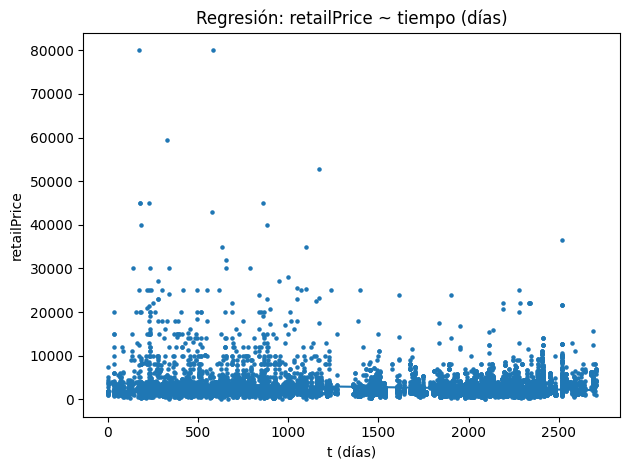

{'beta_0': 3630.84191039127, 'beta_1': -0.5627709822045607, 'R2': 0.020396891816246043}


In [19]:
# 7.2) Regresión: retailPrice ~ tiempo
if not df_reg.empty and 'retailPrice' in df_reg.columns:
    x = df_reg['t_dias'].to_numpy()
    y = pd.to_numeric(df_reg['retailPrice'], errors='coerce').to_numpy()
    ok = ~np.isnan(y)
    x, y = x[ok], y[ok]
    if len(x)>1 and len(y)>1:
        b1, b0 = np.polyfit(x, y, 1)
        yhat = b1*x + b0
        ss_res = ((y - yhat)**2).sum()
        ss_tot = ((y - y.mean())**2).sum()
        r2 = 1 - ss_res/ss_tot if ss_tot!=0 else np.nan
        plt.figure(); plt.scatter(x, y, s=5); plt.plot(x, yhat); plt.title('Regresión: retailPrice ~ tiempo (días)')
        plt.xlabel('t (días)'); plt.ylabel('retailPrice'); plt.tight_layout(); plt.show()
        print({'beta_0': float(b0), 'beta_1': float(b1), 'R2': float(r2)})
    else:
        print('Datos insuficientes para ajuste en retailPrice.')
else:
    print('No hay retailPrice o timeCreated válidos.')

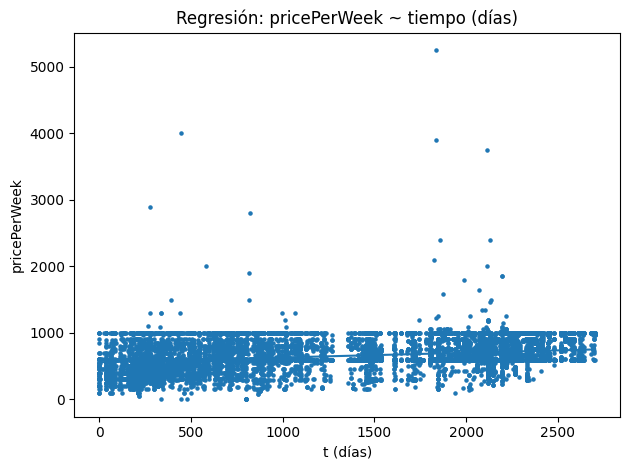

{'beta_0': 557.3542586529476, 'beta_1': 0.0712284615533058, 'R2': 0.06709369318442615}


In [20]:
# 7.3) Regresión: pricePerWeek ~ tiempo (si existe)
if not df_reg.empty and 'pricePerWeek' in df_reg.columns:
    x2 = df_reg['t_dias'].to_numpy()
    y2 = pd.to_numeric(df_reg['pricePerWeek'], errors='coerce').to_numpy()
    ok2 = ~np.isnan(y2)
    x2, y2 = x2[ok2], y2[ok2]
    if len(x2)>1 and len(y2)>1:
        b1, b0 = np.polyfit(x2, y2, 1)
        yhat = b1*x2 + b0
        ss_res = ((y2 - yhat)**2).sum()
        ss_tot = ((y2 - y2.mean())**2).sum()
        r2 = 1 - ss_res/ss_tot if ss_tot!=0 else np.nan
        plt.figure(); plt.scatter(x2, y2, s=5); plt.plot(x2, yhat); plt.title('Regresión: pricePerWeek ~ tiempo (días)')
        plt.xlabel('t (días)'); plt.ylabel('pricePerWeek'); plt.tight_layout(); plt.show()
        print({'beta_0': float(b0), 'beta_1': float(b1), 'R2': float(r2)})
    else:
        print('Datos insuficientes para ajuste en pricePerWeek.')
else:
    print('No hay pricePerWeek o timeCreated válidos.')

## Resultados
(Resume aquí los valores clave de las tablas y R²).

## Conclusiones
(Puntos principales encontrados en el análisis).

## Referencias
- pandas; NumPy; Matplotlib.
- Dataset `outfits.csv` (2025).